# Introduction

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [106]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from scipy.stats import pearsonr

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from imblearn.under_sampling import NearMiss

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from keras import layers
from tensorflow import nn

from tqdm import tqdm


# Data Exploring

In [107]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

### Dataset Report

In [108]:
data.shape

(253680, 22)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [110]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [111]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Preprocessing

### Check and drop dublicated data

In [112]:
data.duplicated().sum()

24206

In [113]:
data.drop_duplicates(inplace = True)

In [114]:
data.duplicated().sum()

0

In [115]:
data.shape

(229474, 22)

# EDA

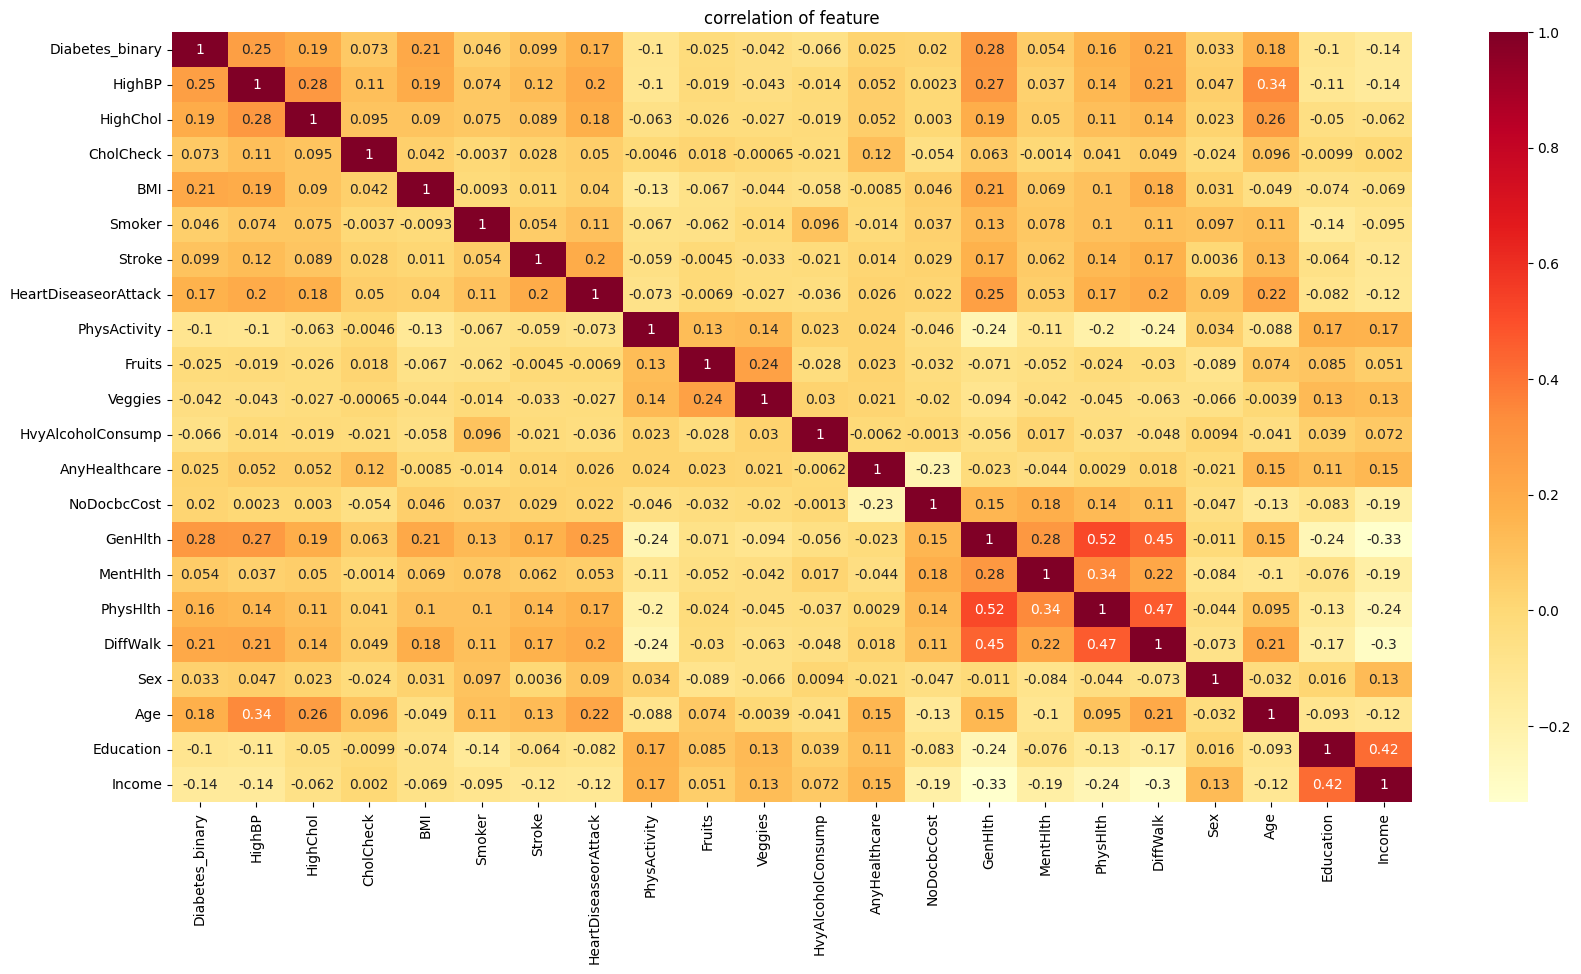

In [116]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()


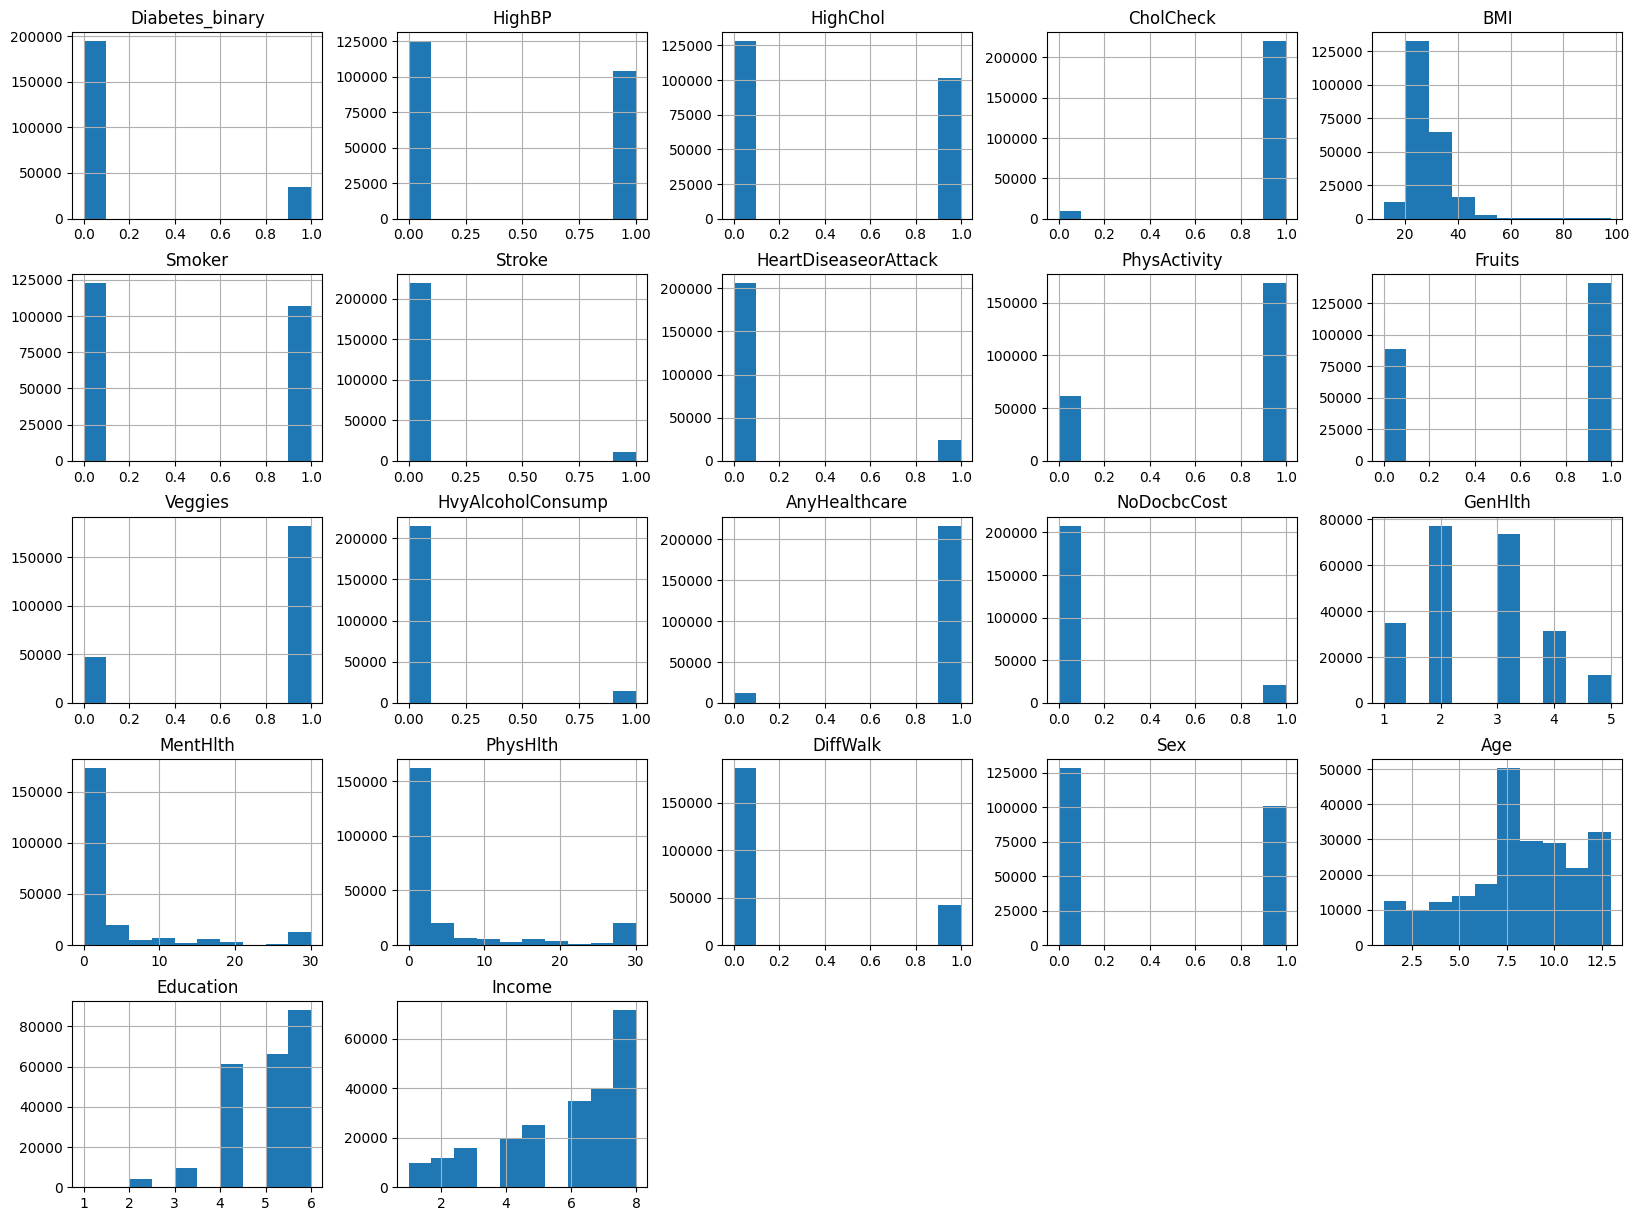

In [117]:
data.hist(figsize=(20,15));

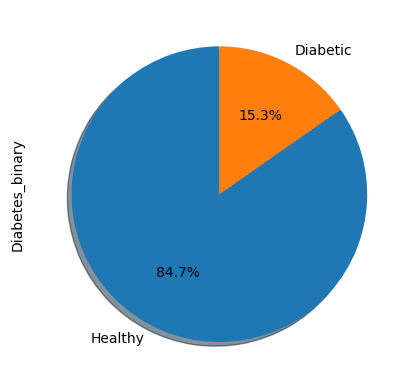

In [118]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

# Data Splitting

In [119]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalancing

In [120]:
Y.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

In [121]:
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm, y_sm = nm.fit_resample(X,Y)

In [122]:
y_sm.shape , x_sm.shape

((70194,), (70194, 21))

In [123]:
X_train , X_test , y_train , y_test = train_test_split(x_sm, y_sm, test_size=0.2 , random_state=42)

# Data Scalling

In [124]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Modeling

In [125]:
from sklearn.metrics import roc_auc_score

algos = [
        LogisticRegression(), 
        RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        KNeighborsClassifier(n_neighbors= 6),
       ]

names = ['Logistic_Regression','RandomForest','Decision_Tree','KNN']
roc_list = []
pred_list = []


In [126]:
for model in tqdm(algos):
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


In [127]:
evaluation = pd.DataFrame({'Model': names,'Score': roc_list})

In [128]:
evaluation = evaluation.sort_values(by='Score', ascending=False)
evaluation

,Model,Score
0,Logistic_Regression,0.911898
1,RandomForest,0.911351
2,Decision_Tree,0.862999
3,KNN,0.857089


Logistic_Regression
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      7012
         1.0       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039



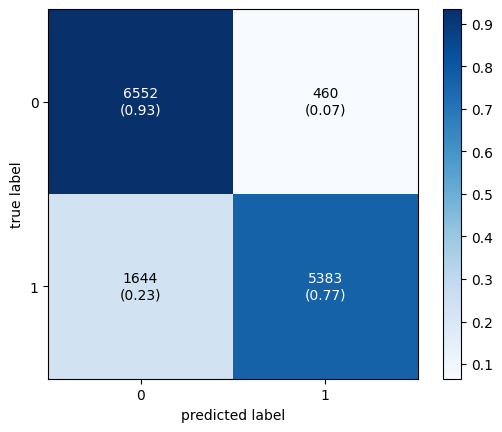

----------------------------------------------------------------------
RandomForest
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      7012
         1.0       0.94      0.73      0.82      7027

    accuracy                           0.84     14039
   macro avg       0.86      0.84      0.84     14039
weighted avg       0.86      0.84      0.84     14039



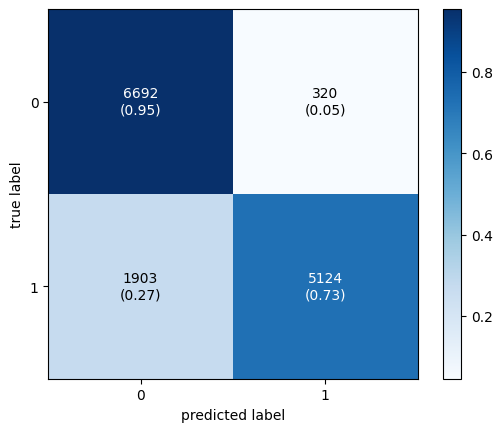

----------------------------------------------------------------------
Decision_Tree
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      7012
         1.0       0.89      0.76      0.82      7027

    accuracy                           0.83     14039
   macro avg       0.84      0.83      0.83     14039
weighted avg       0.84      0.83      0.83     14039



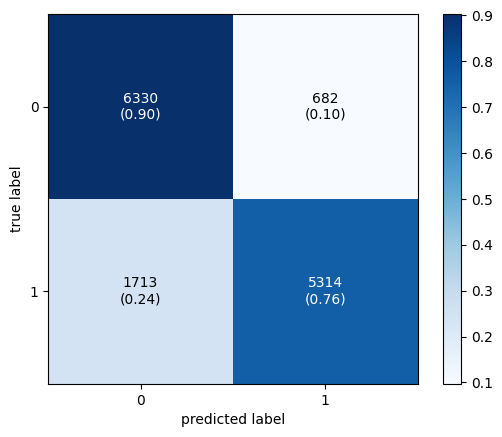

----------------------------------------------------------------------
KNN
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81      7012
         1.0       0.85      0.72      0.78      7027

    accuracy                           0.80     14039
   macro avg       0.80      0.80      0.80     14039
weighted avg       0.80      0.80      0.80     14039



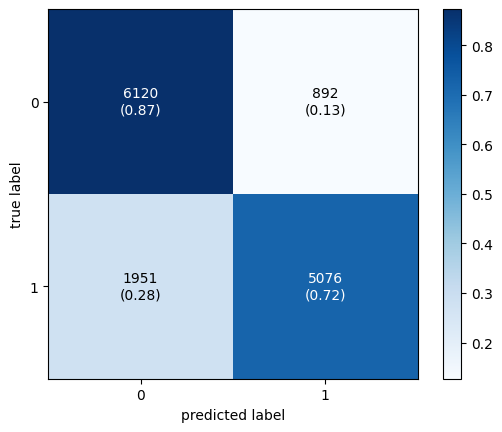

----------------------------------------------------------------------


In [129]:
for i in range(len(names)):  
    name = names[i]

    print(name)
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test,y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Neural Network 

In [130]:
# input_shape = X.shape
# num_classes = 1

In [131]:
# model = keras.Sequential([
#     layers.InputLayer(input_shape=(21,)),
#     layers.Dense(units=64, activation=nn.relu),
#     layers.BatchNormalization(),
#     layers.Dense(units=256, activation=nn.relu),
#     layers.BatchNormalization(),
#     layers.Dense(units=64, activation=nn.relu),
#     layers.BatchNormalization(),
#     layers.Dense(units=256, activation=nn.relu),
#     layers.BatchNormalization(),
#     layers.Dense(units=64, activation=nn.relu),
#     layers.BatchNormalization(),
#     layers.Dense(units=32, activation=nn.relu),
#     layers.Dense(units=1, activation=nn.sigmoid)
# ])

# opt = Adam()
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
# model.summary()

In [133]:
# hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

In [134]:
# history_df = pd.DataFrame(hist.history)
# history_df.loc[0:, ['loss', 'val_loss']].plot(title='Train Loss vs. Valid Loss')
# history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title='Train Accuracy vs. Valid Accuracy');

In [135]:
# y_predicted = model.predict(X_test)
# y_predicted = [1.0 if y >= 0.5 else 0.0 for y in y_predicted]

In [136]:
# print(classification_report(y_test, y_predicted))

In [137]:
# conf_mat = confusion_matrix(y_test, y_predicted)
# class_names = ["No heart disease", "heart disease"]

# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

# df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
# sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# ax.xaxis.set_label_position('top')
# plt.tight_layout()
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label');

# Feature selection

In [138]:
pearsonr_list = []
for l in list(x_sm.columns):
    p,_ = pearsonr(x_sm[l], y_sm)
    pearsonr_list.append(abs(p))

In [139]:
p_value=pd.Series(pearsonr_list,index=x_sm.columns)


In [140]:
p_value.sort_values(ascending=False,inplace=True)


In [141]:
p_value

GenHlth                 0.522024
PhysHlth                0.443045
Income                  0.432675
DiffWalk                0.429271
MentHlth                0.332150
BMI                     0.320092
PhysActivity            0.294423
Education               0.286731
HighBP                  0.238309
HeartDiseaseorAttack    0.232714
NoDocbcCost             0.210837
Stroke                  0.185975
Veggies                 0.182647
HighChol                0.159826
Fruits                  0.133826
AnyHealthcare           0.123683
Smoker                  0.104193
Sex                     0.064405
HvyAlcoholConsump       0.019060
CholCheck               0.014262
Age                     0.004114
dtype: float64

In [142]:
variables = list(p_value.index[:5])

In [143]:
x_sm = x_sm[variables]
x_sm

,GenHlth,PhysHlth,Income,DiffWalk,MentHlth
0,2.0,0.0,8.0,0.0,0.0
1,2.0,0.0,8.0,0.0,0.0
2,2.0,0.0,8.0,0.0,0.0
3,2.0,0.0,8.0,0.0,0.0
4,2.0,0.0,8.0,0.0,0.0
...,...,...,...,...,...
70189,4.0,0.0,1.0,0.0,0.0
70190,2.0,0.0,6.0,1.0,0.0
70191,5.0,0.0,4.0,1.0,15.0
70192,4.0,0.0,4.0,1.0,0.0


In [144]:
X_train , X_test , y_train , y_test = train_test_split(x_sm, y_sm, test_size=0.2 , random_state=42)

# Data Scalling

In [145]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Modeling

In [146]:
algos = [
        LogisticRegression(), 
        RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        KNeighborsClassifier(n_neighbors= 6),
       ]

names = ['Logistic_Regression','RandomForest','Decision_Tree','KNN']
roc_list = []
pred_list = []


In [147]:
for model in tqdm(algos):
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:08<00:00,  2.22s/it]


In [148]:
evaluation = pd.DataFrame({'Model': names,'Score': roc_list})

In [149]:
evaluation = evaluation.sort_values(by='Score', ascending=False)
evaluation

,Model,Score
1,RandomForest,0.893233
0,Logistic_Regression,0.891034
2,Decision_Tree,0.878895
3,KNN,0.862669


Logistic_Regression
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      7012
         1.0       0.91      0.73      0.81      7027

    accuracy                           0.83     14039
   macro avg       0.84      0.83      0.83     14039
weighted avg       0.84      0.83      0.83     14039



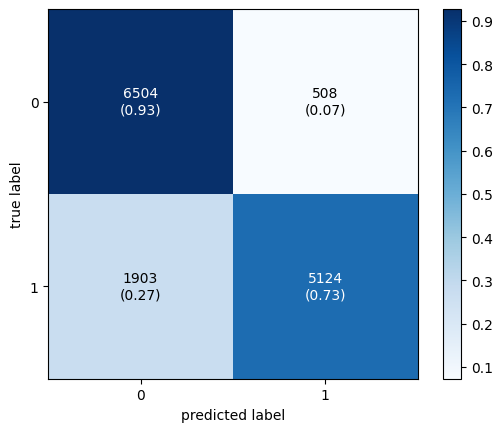

----------------------------------------------------------------------
RandomForest
              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85      7012
         1.0       0.93      0.71      0.81      7027

    accuracy                           0.83     14039
   macro avg       0.85      0.83      0.83     14039
weighted avg       0.85      0.83      0.83     14039



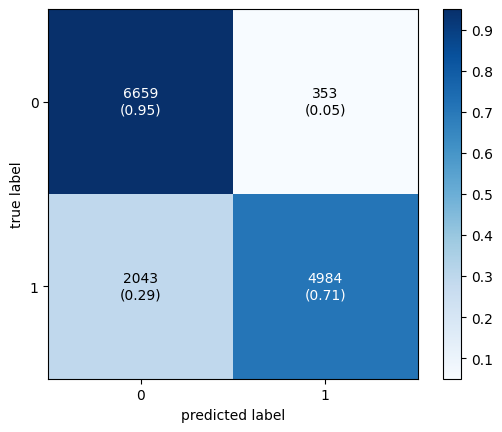

----------------------------------------------------------------------
Decision_Tree
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84      7012
         1.0       0.89      0.74      0.81      7027

    accuracy                           0.82     14039
   macro avg       0.83      0.82      0.82     14039
weighted avg       0.83      0.82      0.82     14039



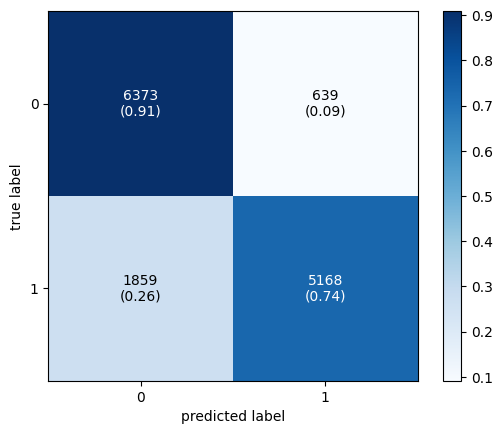

----------------------------------------------------------------------
KNN
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      7012
         1.0       0.92      0.73      0.81      7027

    accuracy                           0.83     14039
   macro avg       0.85      0.83      0.83     14039
weighted avg       0.85      0.83      0.83     14039



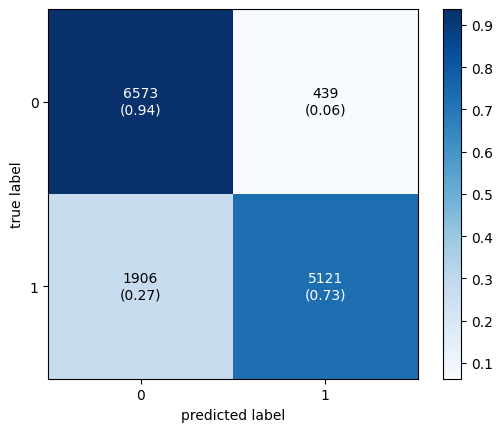

----------------------------------------------------------------------


In [150]:
for i in range(len(names)):  
    name = names[i]

    print(name)
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test,y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")
